# 🏠 PROJECT 5: Machine Learning Analysis of Housing Data with Linear, Logistic Regression, Decisin Tree

### **Subject:** ITELEC303 - Data Analytics with Python 

### **Analyst:** Rhealyn Vasquez

# 🏡 Housing Price Prediction  
Predicting house prices and classifying homes using **Linear Regression**, **Logistic Regression**, and **Decision Tree Regression**.

---

## 📄 Overview
This project analyzes housing data to predict home prices and classify houses as above or below the median sale price.  

It leverages three models:

- **Linear Regression** → Predicts the exact sale price  
- **Logistic Regression** → Classifies homes as high-price vs. low-price  
- **Decision Tree Regressor** → Captures non-linear relationships between features and prices  

These models provide insights useful for **buyers**, **sellers**, and **investors**.

---

## 🛠 Features Used
Key features that strongly impact house prices:

- 🏗 `OverallQual` – Overall quality of the house  
- 📏 `GrLivArea` – Above-ground living area in square feet  
- 🚗 `GarageCars` – Number of cars the garage can fit  
- 🏠 `TotalBsmtSF` – Total basement square footage  
- 🛁 `FullBath` – Number of full bathrooms  
- 📅 `YearBuilt` – Year the house was built  
- 🏡 `TotRmsAbvGrd` – Total rooms above ground  
- 🔥 `Fireplaces` – Number of fireplaces  
- 🌳 `LotArea` – Lot size  
- 📍 `Neighborhood` – Location of the house  

---

## 📊 Methodology

### **Linear Regression**
- Predicts the **exact sale price**  
- Evaluated using **RMSE (Root Mean Squared Error)**  
- **Example Insights:**
  - 💰 Predicted: **$222,925** → Above median → Premium home  
  - 💸 Predicted: **$153,402** → Below median → Moderate home  

### **Logistic Regression**
- Classifies homes as **High Price** (above median) or **Low Price**  
- Evaluated using **accuracy score**  
- **Example Accuracy**: **93.15%** → Reliable classification of premium vs. affordable homes  

### **Decision Tree Regressor**
A **Decision Tree Regressor** was used to capture more complex patterns in the data.

**Why a Decision Tree?**
- Captures **non-linear relationships** that linear models cannot  
- Interpretable: shows how decisions are made through tree splits  
- Handles both numerical and categorical variables naturally  

**Key Insights**
- Features such as **OverallQual**, **GrLivArea**, and **Neighborhood** appear near the top of the tree → strongest predictors  
- Thresholds identified by the tree can indicate price changes:  
  > Example: If `OverallQual ≥ 7` and `GrLivArea ≥ 1800` → likely high-priced home  
- Offers transparency into *why* a prediction was made  

**Performance & Tuning**
- Parameters like `max_depth`, `min_samples_split`, and `min_samples_leaf` were adjusted to reduce overfitting and improve generalization  

---

## 📈 Visualizations
Compare predicted prices with median prices:

```python
plt.bar(['Median Price', 'Predicted Price'], [median_price, predicted_price2], color=['gray', 'skyblue'])
plt.title('Predicted vs. Median House Price')
plt.ylabel('Price ($)')
plt.show()

In [151]:
import pandas as pd
import numpy as np

In [152]:
df = pd.read_csv("datasets\\housing_train.csv")
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [154]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460.0,NaN,NaN,NaN,730.5,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,NaN,NaN,NaN,56.89726,42.300571,20.0,20.0,50.0,70.0,190.0
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201.0,NaN,NaN,NaN,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
LotArea,1460.0,NaN,NaN,NaN,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.5,215245.0
...,...,...,...,...,...,...,...,...,...,...,...
MoSold,1460.0,NaN,NaN,NaN,6.321918,2.703626,1.0,5.0,6.0,8.0,12.0
YrSold,1460.0,NaN,NaN,NaN,2007.815753,1.328095,2006.0,2007.0,2008.0,2009.0,2010.0
SaleType,1460,9,WD,1267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SaleCondition,1460,6,Normal,1198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [156]:
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(exclude=['number']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [157]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [158]:
ordinal_maps = {
    "ExterQual": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1},
    "ExterCond": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1},
    "BsmtQual": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, np.nan:0},
    "BsmtCond": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, np.nan:0},
    "BsmtExposure": {"Gd":4, "Av":3, "Mn":2, "No":1, np.nan:0},
    "BsmtFinType1": {"GLQ":6, "ALQ":5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1, np.nan:0},
    "BsmtFinType2": {"GLQ":6, "ALQ":5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1, np.nan:0},
    "HeatingQC": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1},
    "KitchenQual": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1},
    "FireplaceQu": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, np.nan:0},
    "GarageQual": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, np.nan:0},
    "GarageCond": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, np.nan:0},
    "PoolQC": {"Ex":4, "Gd":3, "TA":2, "Fa":1, np.nan:0},
}

In [159]:
for col, mapping in ordinal_maps.items():
    if col in df.columns:
        df[col] = df[col].map(mapping).astype(int)

df["GarageYrBlt"] = df["GarageYrBlt"].fillna(0).astype(int)

In [160]:
float_cols = ["LotFrontage", "MasVnrArea"]
df[float_cols] = df[float_cols].astype(float)

object_cols = df.select_dtypes(include=["object"]).columns
df[object_cols] = df[object_cols].astype("category")

df.dtypes

Id                  int64
MSSubClass          int64
MSZoning         category
LotFrontage       float64
LotArea             int64
                   ...   
MoSold              int64
YrSold              int64
SaleType         category
SaleCondition    category
SalePrice           int64
Length: 81, dtype: object

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1460 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          1460 non-null   category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   in

# Create a Target for Logistic Regression

In [162]:
median_price = df['SalePrice'].median()
df['HighPrice'] = (df['SalePrice'] > median_price).astype(int)

# Select Features

In [163]:
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 
            'FullBath', 'YearBuilt', 'TotRmsAbvGrd', 'Fireplaces', 
            'LotArea', 'Neighborhood']

X = df[features] 
y_reg = df['SalePrice']  # Linear Regression target
y_clf = df['HighPrice']  # Logistic Regression target

categorical_features = ['Neighborhood']
numeric_features = [f for f in features if f not in categorical_features]

# Preprocess the Data

> Scale numeric features → make them similar scale.

> Encode categorical features → convert text into numbers.

In [164]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# Split Data into Train/Test

In [165]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_reg, y_test_reg, y_train_clf, y_test_clf = train_test_split(
    X, y_reg, y_clf, test_size=0.2, random_state=42
)

# Linear Regression (Predict Price)

In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np 

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)


lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train_reg)

# Predict
y_pred_reg = lr_model.predict(X_test_scaled)

# Evaluate 
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
print(f"Linear Regression RMSE: ${rmse:,.2f}")

Linear Regression RMSE: $36,330.79


# Insight : Reliable Price Estimates

The model predicts house prices with an average error of $36k. This gives buyers and sellers a quick and realistic idea of a house’s value, helping them decide if a home is overpriced or underpriced without a full appraisal.

# Insight: Highlights Key Price Drivers

Features like OverallQual, GrLivArea, GarageCars, and Neighborhood strongly influence price. Even if exact predictions aren’t perfect, the model shows which factors matter most, guiding buyers, sellers, and investors on what impacts value.

# Logistic Regression (Classify High/Low Price)

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train_clf)

# Make predictions
y_pred_clf = log_model.predict(X_test_scaled)

# Evaluate
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"Logistic Regression Accuracy: {accuracy:.2%}")

Logistic Regression Accuracy: 93.15%


# Insight: Highly Accurate Classification

The model can correctly identify whether a house is above or below the median price 93% of the time. This makes it very reliable for quickly classifying homes as “premium” or “affordable” without needing the exact price.

# Insight: Practical Use for Buyers and Sellers

Even without precise price predictions, the model helps buyers, sellers, and investors filter homes: they can focus on high-value properties or identify more affordable options efficiently. It also highlights key features, like OverallQual and GrLivArea, that drive price categories.

# Make Predictions for a New House

In [168]:
new_house = pd.DataFrame({
    'OverallQual': [7],
    'GrLivArea': [2000],
    'GarageCars': [2],
    'TotalBsmtSF': [900],
    'FullBath': [2],
    'YearBuilt': [1995],
    'TotRmsAbvGrd': [7],
    'Fireplaces': [1],
    'LotArea': [8000],
    'Neighborhood': ['CollgCr']
})

new_house_scaled = preprocessor.transform(new_house)

# Linear Regression prediction
predicted_price = lr_model.predict(new_house_scaled)
print(f"Predicted SalePrice: ${predicted_price[0]:,.2f}")

# Logistic Regression prediction
predicted_class = log_model.predict(new_house_scaled)
if predicted_class[0] == 1:
    print("This house is likely above the median price.")
else:
    print("This house is likely below the median price.")

Predicted SalePrice: $222,924.85
This house is likely above the median price.


# Price Prediction

The model estimates this house would sell for $222,925, which is well above the median price. This suggests it is a premium home, likely with higher quality features, more space, and a desirable location compared to most houses in the area.

# Why It Matters

For buyers, this helps understand the house’s position in the market and whether it fits their budget, avoiding surprises during negotiation. For sellers, it provides a data-driven estimate for setting a competitive asking price and highlighting the home’s value. Overall, the prediction gives a clear and actionable view of the house’s market value, making it easier to make informed decisions.

In [169]:
import matplotlib.pyplot as plt

new_house2 = pd.DataFrame({
    'OverallQual': [6],
    'GrLivArea': [1500],
    'GarageCars': [1],
    'TotalBsmtSF': [800],
    'FullBath': [2],
    'YearBuilt': [1985],
    'TotRmsAbvGrd': [6],
    'Fireplaces': [0],
    'LotArea': [7000],
    'Neighborhood': ['NAmes']
})

In [170]:
new_house2_scaled = preprocessor.transform(new_house2)
predicted_price2 = lr_model.predict(new_house2_scaled)[0]
predicted_class2 = log_model.predict(new_house2_scaled)[0]
median_price = df['SalePrice'].median()

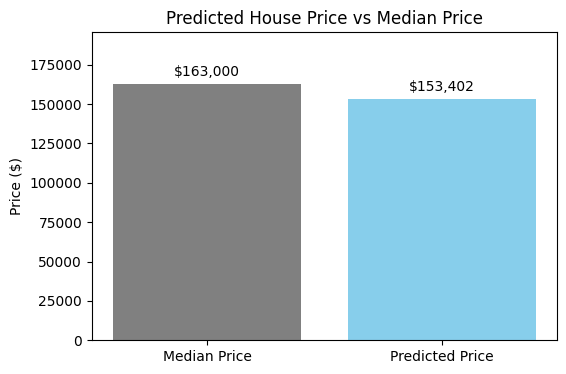

In [171]:
plt.figure(figsize=(6,4))
plt.bar(['Median Price', 'Predicted Price'], [median_price, predicted_price2], color=['gray', 'skyblue'])
plt.title('Predicted House Price vs Median Price')
plt.ylabel('Price ($)')
plt.ylim(0, max(median_price, predicted_price2) * 1.2)
plt.text(0, median_price+5000, f"${median_price:,.0f}", ha='center')
plt.text(1, predicted_price2+5000, f"${predicted_price2:,.0f}", ha='center')
plt.show()

In [172]:
print(f"Predicted SalePrice: ${predicted_price2:,.2f}")
if predicted_class2 == 1:
    print("This house is likely above the median price.")
else:
    print("This house is likely below the median price.")

Predicted SalePrice: $153,401.75
This house is likely below the median price.


# Insight: 
For buyers, this indicates a more affordable option in the market, helping them find value without overspending. For sellers, it provides a data-driven estimate for setting a competitive asking price. Overall, the prediction gives a clear sense of the house’s market position relative to other homes.

# DECISION TREE

In [184]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt

In [185]:
df['HighPrice'] = (df['SalePrice'] > df['SalePrice'].median()).astype(int)

In [186]:
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']

In [187]:
X = df[features]
y_reg = df['SalePrice']      # Regression target
y_clf = df['HighPrice']      # Classification target

In [188]:
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
_, _, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42)

# Decision Tree Regressor

In [190]:
reg_tree = DecisionTreeRegressor(max_depth=5, random_state=42)
reg_tree.fit(X_train, y_train_reg)
y_pred_reg = reg_tree.predict(X_test)

In [191]:
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Decision Tree Regressor Mean Squared Error: {mse:.2f}")

Decision Tree Regressor Mean Squared Error: 1337642320.89


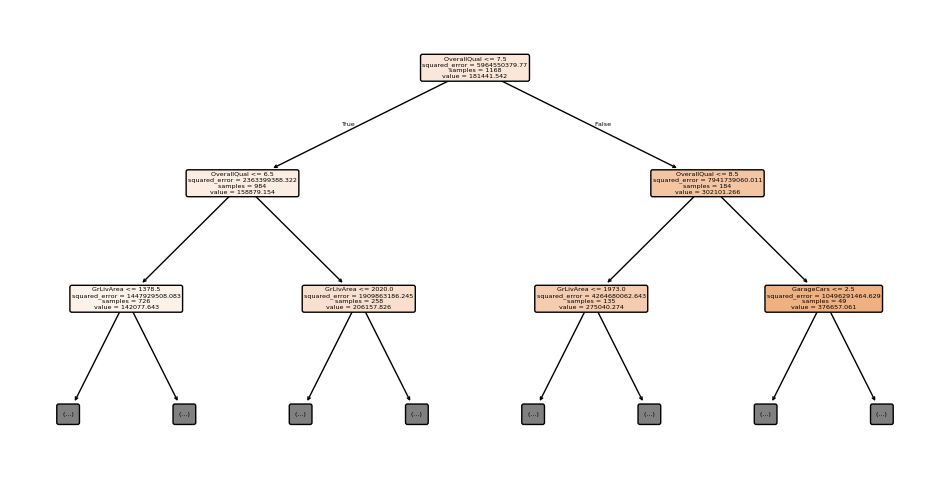

In [205]:
plt.figure(figsize=(12,6))
plt.title("Predicting Housing Prices with Decision Tree Regressor", fontsize=14)
plot_tree(reg_tree, feature_names=features, filled=True, rounded=True, max_depth=2) 
plt.show()

# Insight:
The most important features affecting house prices are Overall Quality and Living Area. Houses with higher quality and larger living spaces tend to have higher prices. Even with a shallow tree, these key patterns are clearly captured and easy to interpret.

# Decision Tree Classifier

In [199]:
clf_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_tree.fit(X_train, y_train_clf)
y_pred_clf = clf_tree.predict(X_test)

In [200]:
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"Decision Tree Classifier Accuracy: {accuracy:.2f}")

Decision Tree Classifier Accuracy: 0.88


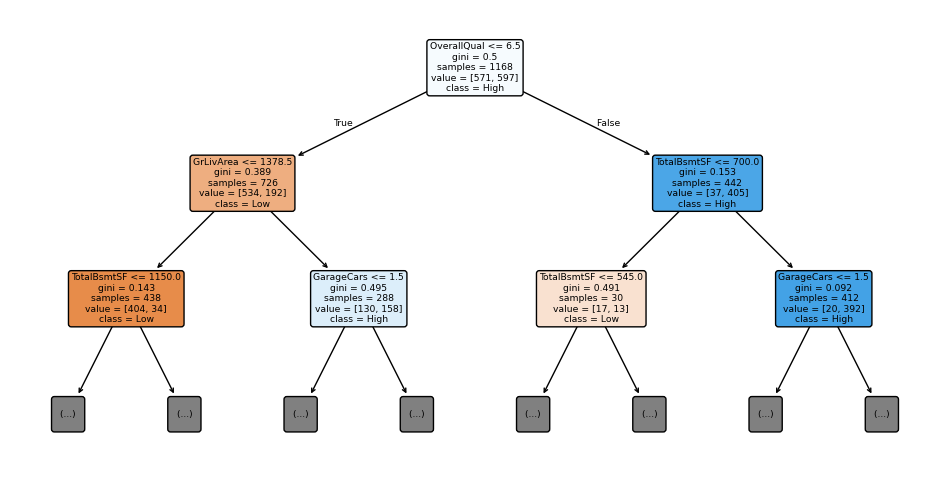

In [201]:
plt.figure(figsize=(12,6))
plt.title("Classifying High vs Low Priced Houses with Decision Tree", fontsize=14)
plot_tree(clf_tree, feature_names=features, class_names=['Low', 'High'], filled=True, rounded=True, max_depth=2)
plt.show()

# Insight: 
High-priced houses are more likely to have better overall quality and larger garages.The decision tree highlights that Living Area and Total Basement Space also contribute to price classification. This simple tree provides an easy way to see which features separate high-priced from low-priced homes.